In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Printing basic data
print('People =', len(titanic))
print(titanic.columns)
titanic.isnull().sum()

People = 891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Part 1: Variance

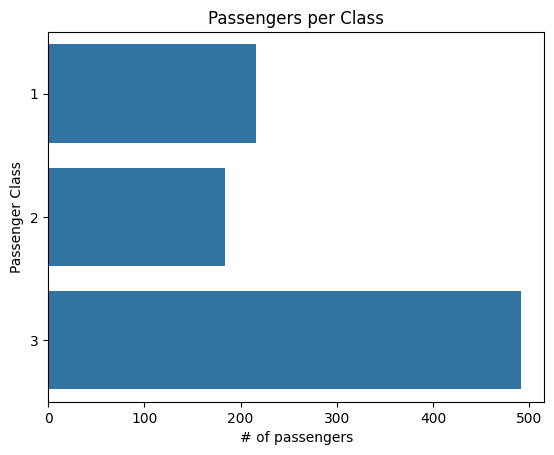

In [4]:
# Explore classes and their distribution
sns.countplot(data=titanic, y='Pclass')
plt.title('Passengers per Class')
plt.xlabel('# of passengers')
plt.ylabel('Passenger Class')
plt.show()

#

This reveals some interesting information regarding passenger class. As expected, third class is the most crowded of the three, but we also learn first class had more people than second class.

This distribution is probably due to the reasons of boarding the titanic; there was a good amount of big personalities expecting to be remembered in history for boarding the Titanic. On the other side, I believe there were many immigrants in third class looking for working opportunities in America. The second-class didn't really have a big selling point as the other two.

Mean: 32.204207968574636
STD: 49.6655344447741
Median: 14.4542


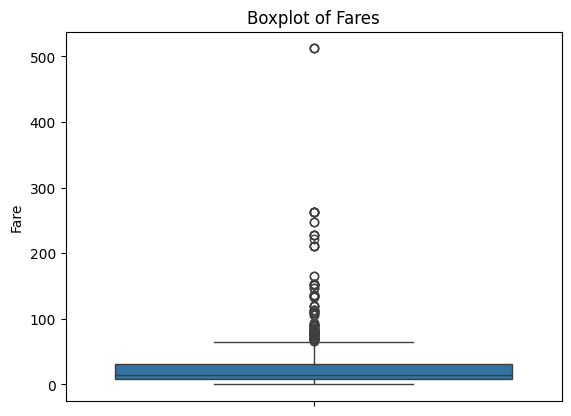

In [5]:
# Explore fares and their variance
sns.boxplot(data=titanic, y='Fare')
print("Mean:", np.mean(titanic['Fare']))
print("STD:", np.std(titanic['Fare']))
print("Median:", np.median(titanic['Fare']))

plt.title('Boxplot of Fares')
plt.ylabel('Fare')
plt.show()

This standard deviation indicates an unusually high dispersion of the data,
which, when confirming with the boxplot and other data, means there was some people paying
a lot more money than the rest.

Again, this could be due to the culture at the time regarding the Titanic and the popularity among the wealthy to be in it while maintaining their status and importance by getting the best cabins and privacy, while there were significantly more people boarding it with those possibilities.

# Part 2: Covariance

## What is the survivability of passengers per class?

The priorization of different classes' lives has been highlighted for decades, so now we will verify its connection to reality (the data), as well as find out, if confirmed, how priority changed per class.

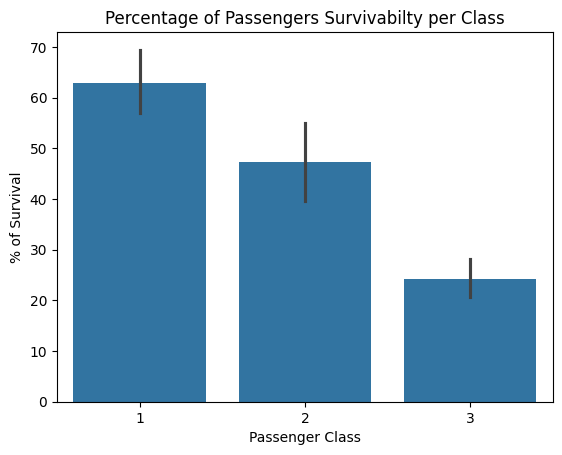

In [6]:
# We plot survivability per class
sns.barplot(x = titanic['Pclass'], y = titanic['Survived'] * 100) # Thus gives the mean per class (from 0 to 1) times 100 to display as percentage
plt.title('Percentage of Passengers Survivabilty per Class')
plt.xlabel('Passenger Class')
plt.ylabel('% of Survival')
plt.show()

It appears there is a certain tendency of survibability regarding class, so the claims do hold their ground. This is curious since there were some people similar fares but also completely different classes.

In [7]:
similar_fare_ex = titanic[(titanic['Fare'] < 57) & (titanic['Fare'] > 55)]
similar_fare_ex

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


# This raises the question: how much does fare itself influence survivability?
We  will look at the lowest and top 3% regarding fares.

In [8]:
# We define them as "overpayers" and "underpayers"
quartiles = titanic['Fare'].quantile([0.05, 0.95]) 
overpayers = titanic.query(f'Fare > {quartiles[0.95]}')
underpayers =  titanic.query(f'Fare < {quartiles[0.05]}')

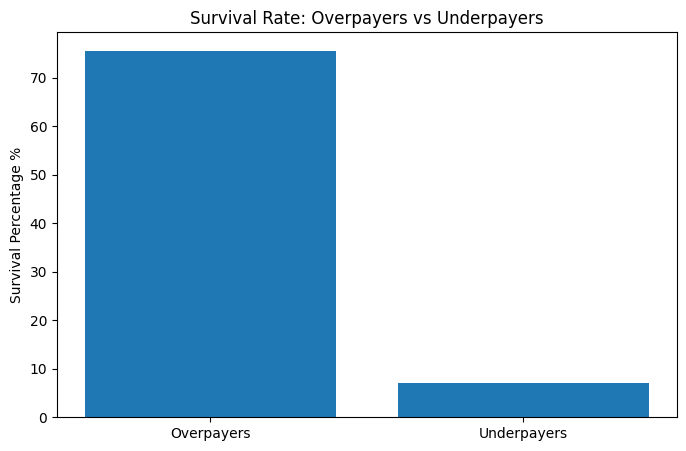

In [9]:
# Now we compare the survivability of overpaying and underpaying people and plot 
over_survival = len(overpayers.query('Survived == 1'))/len(overpayers)*100
under_survival = len(underpayers.query('Survived == 1'))/len(underpayers)*100

plt.figure(figsize=(8,5))
plt.bar(['Overpayers', 'Underpayers'], [over_survival, under_survival])

plt.title('Survival Rate: Overpayers vs Underpayers')
plt.ylabel('Survival Percentage %')

plt.show()